<a href="https://colab.research.google.com/github/err400/summer-of-code-2024/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d rupakroy/online-payments-fraud-detection-dataset

Dataset URL: https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset
License(s): CC-BY-NC-SA-4.0
 99% 176M/178M [00:11<00:00, 18.3MB/s]
100% 178M/178M [00:11<00:00, 16.7MB/s]


In [ ]:
! unzip online-payments-fraud-detection-dataset.zip

Archive:  online-payments-fraud-detection-dataset.zip
  inflating: PS_20174392719_1491204439457_log.csv  


In [ ]:
import pandas as pd

In [ ]:
td = pd.read_csv("PS_20174392719_1491204439457_log.csv")

In [ ]:
td

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


EDA

1. Convert fields to numerical type
2. Normalize the data

In [ ]:
td['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
one_hot = pd.get_dummies(td['type'])
td = td.drop('type',axis = 1)
td = td.join(one_hot)
td

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,False,False,False,True,False
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,False,False,False,True,False
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,False,False,False,False,True
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,False,True,False,False,False
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,False,True,False,False,False
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,False,False,False,False,True
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,False,True,False,False,False
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,False,False,False,False,True


In [ ]:
td['isFlaggedFraud'].unique()

array([0, 1])

I also dropped name-orig field as it was not useful but ran it multiple times which gave error

In [ ]:
td=td.drop(columns=["nameOrig"])
td

,step,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.00,160296.36,M1979787155,0.00,0.00,0,0,False,False,False,True,False
1,1,1864.28,21249.00,19384.72,M2044282225,0.00,0.00,0,0,False,False,False,True,False
2,1,181.00,181.00,0.00,C553264065,0.00,0.00,1,0,False,False,False,False,True
3,1,181.00,181.00,0.00,C38997010,21182.00,0.00,1,0,False,True,False,False,False
4,1,11668.14,41554.00,29885.86,M1230701703,0.00,0.00,0,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,C776919290,0.00,339682.13,1,0,False,True,False,False,False
6362616,743,6311409.28,6311409.28,0.00,C1881841831,0.00,0.00,1,0,False,False,False,False,True
6362617,743,6311409.28,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,False,True,False,False,False
6362618,743,850002.52,850002.52,0.00,C2080388513,0.00,0.00,1,0,False,False,False,False,True


In [ ]:
td

,step,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.00,160296.36,M1979787155,0.00,0.00,0,0,False,False,False,True,False
1,1,1864.28,21249.00,19384.72,M2044282225,0.00,0.00,0,0,False,False,False,True,False
2,1,181.00,181.00,0.00,C553264065,0.00,0.00,1,0,False,False,False,False,True
3,1,181.00,181.00,0.00,C38997010,21182.00,0.00,1,0,False,True,False,False,False
4,1,11668.14,41554.00,29885.86,M1230701703,0.00,0.00,0,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,C776919290,0.00,339682.13,1,0,False,True,False,False,False
6362616,743,6311409.28,6311409.28,0.00,C1881841831,0.00,0.00,1,0,False,False,False,False,True
6362617,743,6311409.28,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,False,True,False,False,False
6362618,743,850002.52,850002.52,0.00,C2080388513,0.00,0.00,1,0,False,False,False,False,True


In [ ]:
#now to see what are the types of destinations
td["nameDest-type"]=td['nameDest'].str[0]

In [ ]:
td

,step,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameDest-type
0,1,9839.64,170136.00,160296.36,M1979787155,0.00,0.00,0,0,False,False,False,True,False,M
1,1,1864.28,21249.00,19384.72,M2044282225,0.00,0.00,0,0,False,False,False,True,False,M
2,1,181.00,181.00,0.00,C553264065,0.00,0.00,1,0,False,False,False,False,True,C
3,1,181.00,181.00,0.00,C38997010,21182.00,0.00,1,0,False,True,False,False,False,C
4,1,11668.14,41554.00,29885.86,M1230701703,0.00,0.00,0,0,False,False,False,True,False,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,C776919290,0.00,339682.13,1,0,False,True,False,False,False,C
6362616,743,6311409.28,6311409.28,0.00,C1881841831,0.00,0.00,1,0,False,False,False,False,True,C
6362617,743,6311409.28,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,False,True,False,False,False,C
6362618,743,850002.52,850002.52,0.00,C2080388513,0.00,0.00,1,0,False,False,False,False,True,C


In [ ]:
td['nameDest-type'].unique()

array(['M', 'C'], dtype=object)

In [ ]:
one_hot = pd.get_dummies(td['nameDest-type'])
td = td.drop('nameDest-type',axis = 1)
td = td.join(one_hot)
td

,step,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C,M
0,1,9839.64,170136.00,160296.36,M1979787155,0.00,0.00,0,0,False,False,False,True,False,False,True
1,1,1864.28,21249.00,19384.72,M2044282225,0.00,0.00,0,0,False,False,False,True,False,False,True
2,1,181.00,181.00,0.00,C553264065,0.00,0.00,1,0,False,False,False,False,True,True,False
3,1,181.00,181.00,0.00,C38997010,21182.00,0.00,1,0,False,True,False,False,False,True,False
4,1,11668.14,41554.00,29885.86,M1230701703,0.00,0.00,0,0,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,C776919290,0.00,339682.13,1,0,False,True,False,False,False,True,False
6362616,743,6311409.28,6311409.28,0.00,C1881841831,0.00,0.00,1,0,False,False,False,False,True,True,False
6362617,743,6311409.28,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,False,True,False,False,False,True,False
6362618,743,850002.52,850002.52,0.00,C2080388513,0.00,0.00,1,0,False,False,False,False,True,True,False


In [ ]:
td=td.drop(columns=["nameDest","M"])

In [ ]:
td

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,False,False,False,True,False,False
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,False,False,False,True,False,False
2,1,181.00,181.00,0.00,0.00,0.00,1,0,False,False,False,False,True,True
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,False,True,False,False,False,True
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,False,True,False,False,False,True
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,False,False,False,False,True,True
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,False,True,False,False,False,True
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,False,False,False,False,True,True


Normalizing the features

In [ ]:
def norm_column(df,col):
  df_col = df[col]
  maxi=df_col.max()
  mini=df_col.min()
  df[col]=(df_col - mini)/(maxi - mini)

In [ ]:
norm_cols=[
    "step",
    "amount",
    "oldbalanceOrg",
    "newbalanceOrig",
    "oldbalanceDest",
    "newbalanceDest"
]

for col in norm_cols:
  norm_column(td,col)

td

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C
0,0.0,0.000106,0.002855,0.003233,0.000000,0.000000,0,0,False,False,False,True,False,False
1,0.0,0.000020,0.000357,0.000391,0.000000,0.000000,0,0,False,False,False,True,False,False
2,0.0,0.000002,0.000003,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True
3,0.0,0.000002,0.000003,0.000000,0.000059,0.000000,1,0,False,True,False,False,False,True
4,0.0,0.000126,0.000697,0.000603,0.000000,0.000000,0,0,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,1.0,0.003674,0.005701,0.000000,0.000000,0.000954,1,0,False,True,False,False,False,True
6362616,1.0,0.068272,0.105923,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True
6362617,1.0,0.068272,0.105923,0.000000,0.000192,0.017912,1,0,False,True,False,False,False,True
6362618,1.0,0.009195,0.014265,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True


Addressing class imbalance

In [ ]:
td["isFraud"].sum()

8213

In [ ]:
td_isFraud=td[td["isFraud"] == 1]
#Creating a new table where all frauds are there
td_isFraud

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C
2,0.0,0.000002,0.000003,0.0,0.000000,0.000000,1,0,False,False,False,False,True,True
3,0.0,0.000002,0.000003,0.0,0.000059,0.000000,1,0,False,True,False,False,False,True
251,0.0,0.000030,0.000047,0.0,0.000000,0.000000,1,0,False,False,False,False,True,True
252,0.0,0.000030,0.000047,0.0,0.000074,0.000000,1,0,False,True,False,False,False,True
680,0.0,0.000218,0.000338,0.0,0.000000,0.000000,1,0,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,1.0,0.003674,0.005701,0.0,0.000000,0.000954,1,0,False,True,False,False,False,True
6362616,1.0,0.068272,0.105923,0.0,0.000000,0.000000,1,0,False,False,False,False,True,True
6362617,1.0,0.068272,0.105923,0.0,0.000192,0.017912,1,0,False,True,False,False,False,True
6362618,1.0,0.009195,0.014265,0.0,0.000000,0.000000,1,0,False,False,False,False,True,True


In [ ]:
td_isnotFraud=td[td["isFraud"] == 0]
#Creating a new table where all frauds are not there
td_isnotFraud

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C
0,0.000000,0.000106,0.002855,0.003233,0.00000,0.000000,0,0,False,False,False,True,False,False
1,0.000000,0.000020,0.000357,0.000391,0.00000,0.000000,0,0,False,False,False,True,False,False
4,0.000000,0.000126,0.000697,0.000603,0.00000,0.000000,0,0,False,False,False,True,False,False
5,0.000000,0.000085,0.000904,0.000929,0.00000,0.000000,0,0,False,False,False,True,False,False
6,0.000000,0.000077,0.003075,0.003551,0.00000,0.000000,0,0,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362319,0.966307,0.000093,0.008707,0.010289,0.00000,0.000000,0,0,False,False,False,True,False,False
6362320,0.966307,0.001722,0.000065,0.000000,0.00000,0.000447,0,0,False,True,False,False,False,True
6362321,0.966307,0.002015,0.002820,0.000000,0.00007,0.000593,0,0,False,True,False,False,False,True
6362322,0.966307,0.000888,0.000226,0.000000,0.00000,0.000230,0,0,False,False,False,False,True,True


In [ ]:
td_isnotFraud = td_isnotFraud.sample(n=8213)

In [ ]:
td_isnotFraud

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C
5426864,0.508086,0.000227,0.057585,0.069621,0.000773,0.000714,0,0,True,False,False,False,False,True
132078,0.013477,0.000043,0.000000,0.000000,0.000000,0.000000,0,0,False,False,False,True,False,False
6139538,0.731806,0.004490,0.505245,0.615510,0.001969,0.000803,0,0,True,False,False,False,False,True
1160474,0.175202,0.000229,0.000000,0.000000,0.000430,0.000489,0,0,False,True,False,False,False,True
3400952,0.342318,0.000032,0.000832,0.000939,0.000000,0.000000,0,0,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926001,0.223720,0.003626,0.095807,0.121889,0.002178,0.001236,0,0,True,False,False,False,False,True
5346750,0.504043,0.001814,0.004941,0.002555,0.006110,0.006578,0,0,False,True,False,False,False,True
619218,0.044474,0.002361,0.240439,0.293331,0.084120,0.083046,0,0,True,False,False,False,False,True
2602256,0.278976,0.000472,0.000924,0.000230,0.000000,0.000123,0,0,False,False,False,False,True,True


In [ ]:
td = pd.concat([td_isFraud, td_isnotFraud])
td

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C
2,0.000000,0.000002,0.000003,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True
3,0.000000,0.000002,0.000003,0.000000,0.000059,0.000000,1,0,False,True,False,False,False,True
251,0.000000,0.000030,0.000047,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True
252,0.000000,0.000030,0.000047,0.000000,0.000074,0.000000,1,0,False,True,False,False,False,True
680,0.000000,0.000218,0.000338,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926001,0.223720,0.003626,0.095807,0.121889,0.002178,0.001236,0,0,True,False,False,False,False,True
5346750,0.504043,0.001814,0.004941,0.002555,0.006110,0.006578,0,0,False,True,False,False,False,True
619218,0.044474,0.002361,0.240439,0.293331,0.084120,0.083046,0,0,True,False,False,False,False,True
2602256,0.278976,0.000472,0.000924,0.000230,0.000000,0.000123,0,0,False,False,False,False,True,True


Classification algorithms

Random forest

In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
# Split the data into features (X) and target (y)
X = td.drop('isFraud', axis=1)
y = td['isFraud']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train , y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test , y_pred)
print("accuracy" , accuracy)

accuracy 0.9905660377358491


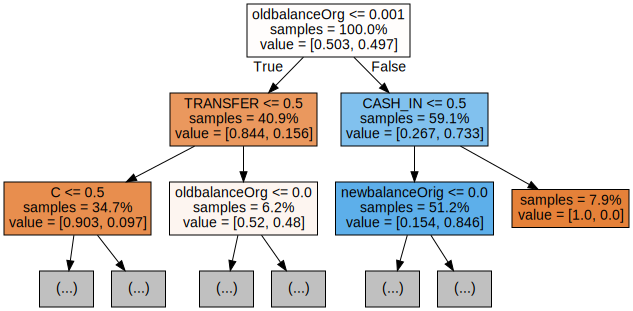

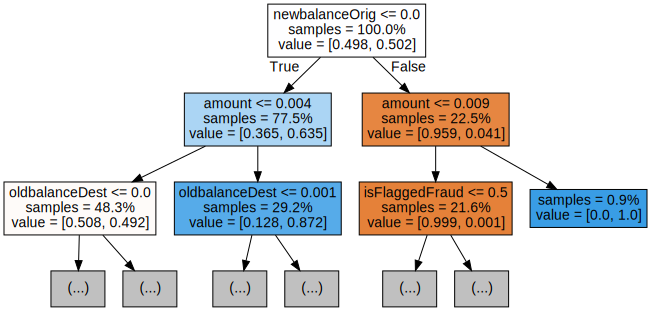

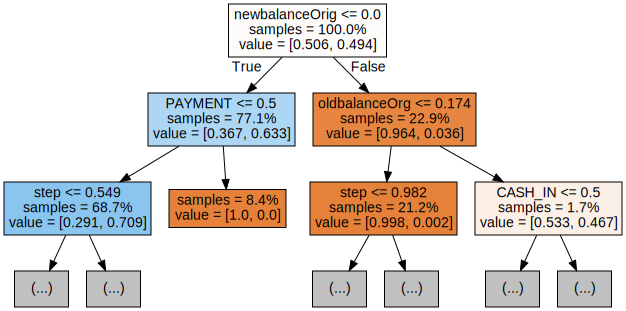

In [ ]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [ ]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c30edb36770>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c30edb36650>})

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 14, 'n_estimators': 342}


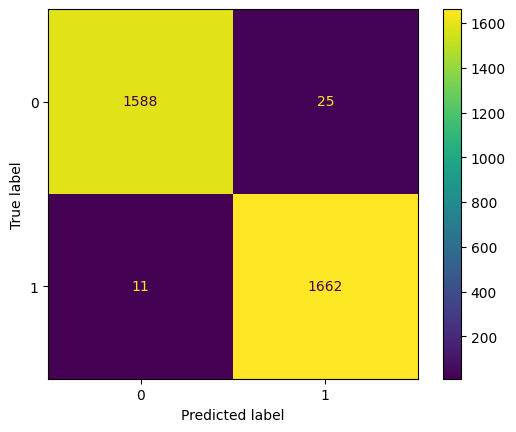

In [ ]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9890444309190505
Precision: 0.9851807943094251
Recall: 0.9934249850567842


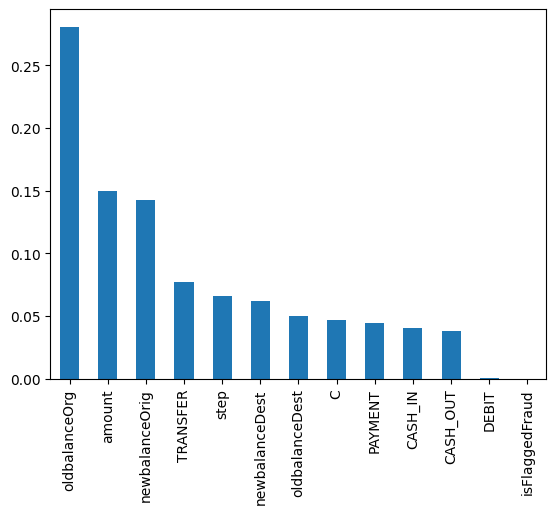

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

# Convert the data into DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',
    'max_depth': 6,
    'eta': 0.1,
    'subsample': 0.8
}

# Train the model
num_rounds = 100
bst = xgb.train(params, dtrain, num_rounds)


In [ ]:
xgb_preds = bst.predict(dtest)
xgb_preds = np.round(xgb_preds)

In [ ]:
from sklearn.metrics import classification_report
accuracy2 = accuracy_score(y_test, xgb_preds)
print(f'XGBoost Accuracy: {accuracy2}')
print(f'Classification Report: \n{classification_report(y_test, xgb_preds)}')

XGBoost Accuracy: 0.992696287279367
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1613
           1       0.99      1.00      0.99      1673

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286

